In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
from matplotlib import font_manager, rc
%matplotlib inline

In [2]:
# 차트에서 한글 출력을 위한 설정
import platform
your_os = platform.system()
if your_os == 'Linux':
    rc('font', family='NanumGothic')
elif your_os == 'Windows':
    ttf = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=ttf).get_name()
    rc('font', family=font_name)
elif your_os == 'Darwin':
    rc('font', family='AppleGothic')
rc('axes', unicode_minus=False)

In [3]:
from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from scipy.stats import randint

In [4]:
dataset = fetch_california_housing()

In [5]:
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df['target'] = dataset.target

In [7]:
X = dataset.data
y = dataset.target
print(X.shape) #(20640, 8)
print(y.shape) #(20640,)

(20640, 8)
(20640,)


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [9]:
# define the parameter space that will be searched over
param_distributions = {'n_estimators': randint(1, 5),
                       'max_depth': randint(5, 10)}

In [10]:
param_distributions

{'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen at 0x20e26123160>,
 'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen at 0x20e24efc7c0>}

In [11]:
# now create a searchCV object and fit it to the data
search = RandomizedSearchCV(estimator=RandomForestRegressor(random_state=0),
                            n_iter=5,
                            param_distributions=param_distributions,
                            random_state=0)

In [12]:
search.fit(X_train, y_train)

RandomizedSearchCV(estimator=RandomForestRegressor(random_state=0), n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000020E24EFC7C0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000020E26123160>},
                   random_state=0)

In [13]:
from sklearn import svm

regr = svm.SVR()
regr.fit(x_data, y_data)

NameError: name 'x_data' is not defined

In [24]:
pred = regr.predict(X_test)

In [25]:
pred

array([1.7554298 , 1.84194121, 1.77758078, ..., 1.76394663, 1.79281448,
       1.88049662])

In [31]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score



In [30]:
print(mean_squared_error(y_test, pred))

1.3351769037902255


# 2020F ML slide all(page 51)

## 데이터 준비

In [14]:
from sklearn import datasets

In [15]:
digits = datasets.load_digits()

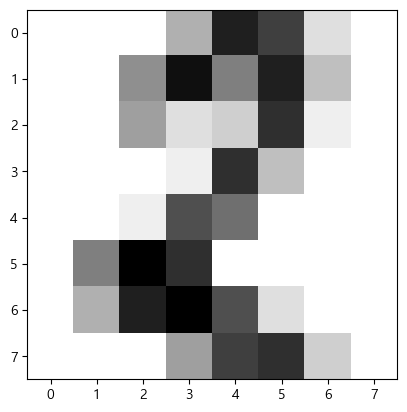

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(digits.data[50].reshape(8,8), cmap = plt.cm.gray_r)

In [17]:
digits.target[50]

2

In [18]:
X,y = digits.data, digits.target

In [19]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [20]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

## 데이터 분할

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.3, random_state=0)

## 모형 생성 - 로지스틱 회귀분석

In [39]:
from sklearn.linear_model import LogisticRegression

In [40]:
model = LogisticRegression()

In [41]:
model.fit(X_train, y_train)

/Users/hansol/opt/anaconda3/envs/ML/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

## 모형 평가

In [42]:
model.score(X_test,y_test)

0.9537037037037037

## Preprocessing

### Standardization

In [ ]:
Standardization,